In [66]:
#Install necessary library for the EDA
!pip install matplotlib 
!pip install numpy 
!pip install pandas

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.8 MB/s eta 0:00:00
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 5.1 MB/s eta 0:00:00:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 k

In [79]:
#Import installed library to make them use in EDA

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [80]:
dataset_path = "/Users/borhan/Desktop/Potsdam Study/Research Software/Project_RSE_824909/data/Traffic accident.csv"

In [81]:
# Read the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
df.head()

,Year,Persons killed,Seriously injured,Slightly injured,Kind of accident,Area type
0,2008,288,6797,18293,Driving accident,inner town
1,2009,294,6719,18346,Driving accident,inner town
2,2010,251,5864,16825,Driving accident,inner town
3,2011,244,6459,16602,Driving accident,inner town
4,2012,221,6177,16626,Driving accident,inner town


In [82]:
#To check the dataset's columns and rows
print("Number of rows and columns:", df.shape)

Number of rows and columns: (90, 6)


In [83]:
# Check for missing values
df.isnull().sum()

Year                 0
Persons killed       0
Seriously injured    0
Slightly injured     0
Kind of accident     0
Area type            0
dtype: int64

In [84]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,Kind of accident,Area type
count,90,90
unique,3,2
top,Driving accident,inner town
freq,30,45


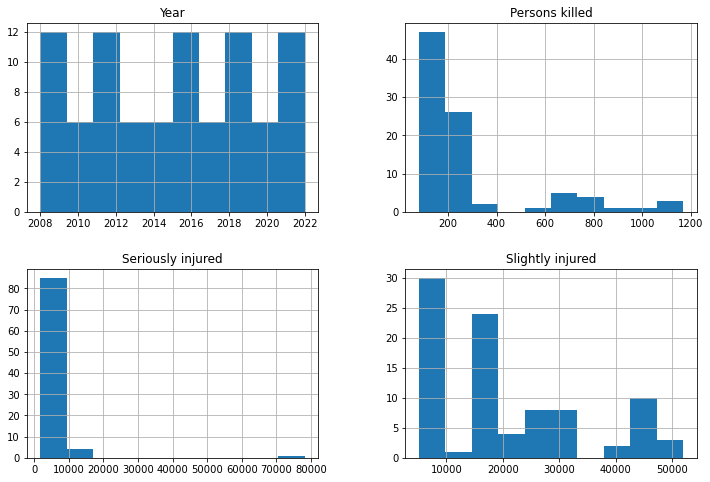

In [85]:
# Histograms
df.hist(figsize=(12, 8))
plt.show()


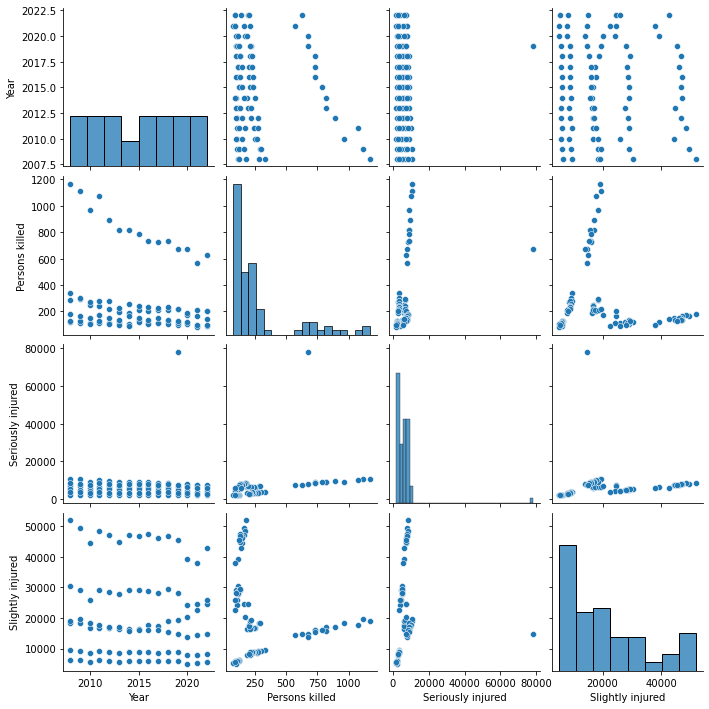

In [86]:
# Scatter plot
sns.pairplot(df)
plt.show()


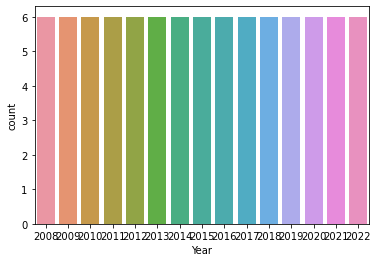

In [87]:
# Count plot
sns.countplot(x='Year', data=df)
plt.show()


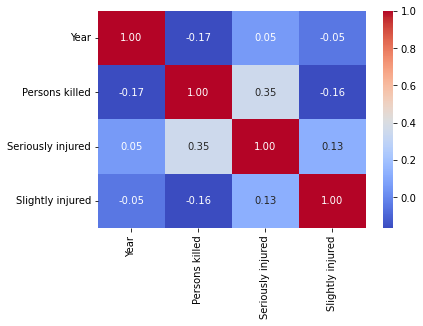

In [88]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [48]:
#Research question -1: Over the all years, which kind of accident is responsible for most death ocuurance?



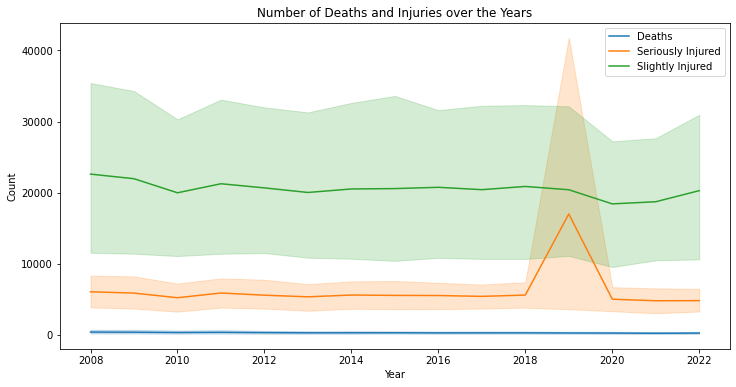

In [89]:
# Plot the number of deaths and injuries over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Persons killed', data=df, label='Deaths')
sns.lineplot(x='Year', y='Seriously injured', data=df, label='Seriously Injured')
sns.lineplot(x='Year', y='Slightly injured', data=df, label='Slightly Injured')
plt.title('Number of Deaths and Injuries over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

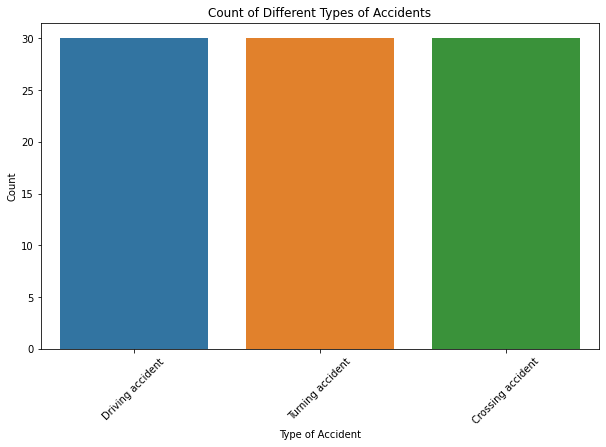

In [90]:
# Research Question 2: What are the most common types of accidents?

# Count plot for type of accident
plt.figure(figsize=(10, 6))
sns.countplot(x='Kind of accident', data=df)
plt.title('Count of Different Types of Accidents')
plt.xlabel('Type of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Research Question 3: Which cities have the highest number of accidents?

# Count plot for city of accident
plt.figure(figsize=(12, 6))
sns.countplot(x='Areas', data=df, order=df['Areas'].value_counts().index)
plt.title('Count of Accidents by City')
plt.xlabel('City of Accident')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

KeyError: 'Areas'

<Figure size 864x432 with 0 Axes>

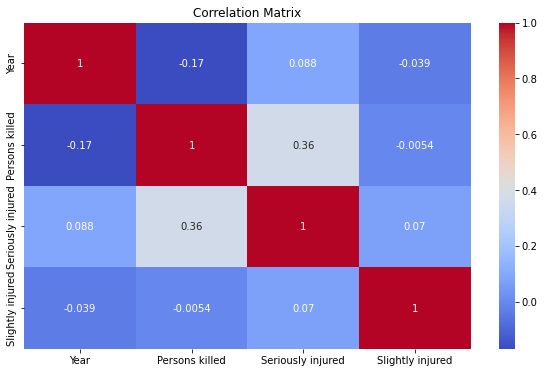

In [73]:
# Research Question 4: Is there any correlation between the severity of accidents and the number of deaths or injuries?

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

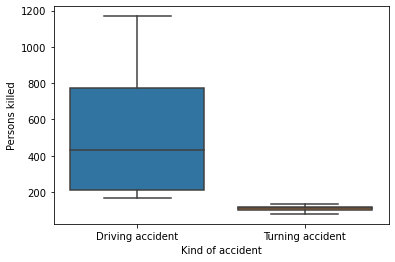

In [60]:
# Explore relationship between kind of accident and injury severity (if injury columns are numerical)
sns.boxplot(x='Kind of accident', y='Persons killed', data=df)  # Repeat for other injury columns
plt.show()

In [76]:
# Explore city-wise distribution of accidents (may need further cleaning of city names)
df['Areas'].value_counts().plot(kind='bar')
plt.show()

KeyError: 'Areas'

In [77]:
# Assuming 'kind of accident' is a categorical column (e.g., 'collision', 'fall', etc.)
correlation = df.groupby('Kind of accident')['Seriously injured'].mean()
print(correlation)

Kind of accident
Driving accident    10009.500000
Turning accident     3347.433333
Name: Seriously injured, dtype: float64
